In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [ ]:
file_path = "/content/drive/MyDrive/Customer_churn_Telecom/data/raw/Telco_customer_churn.xlsx"
df = pd.read_excel(file_path)

df.head()


,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [ ]:
# Sirf churn hone wale customers
churned_df = df[df["Churn Label"] == "Yes"]

churned_df.shape


(1869, 33)

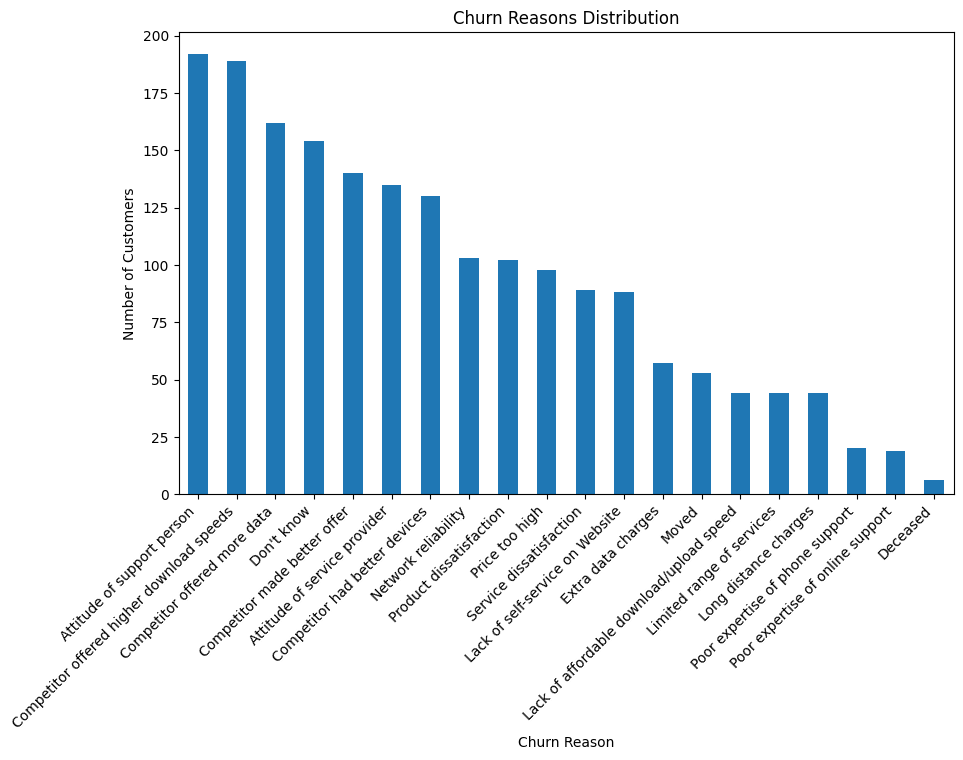

In [ ]:
churn_reason_counts = churned_df["Churn Reason"].value_counts()

plt.figure(figsize=(10,6))
churn_reason_counts.plot(kind="bar")
plt.title("Churn Reasons Distribution")
plt.xlabel("Churn Reason")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45, ha="right")
plt.show()


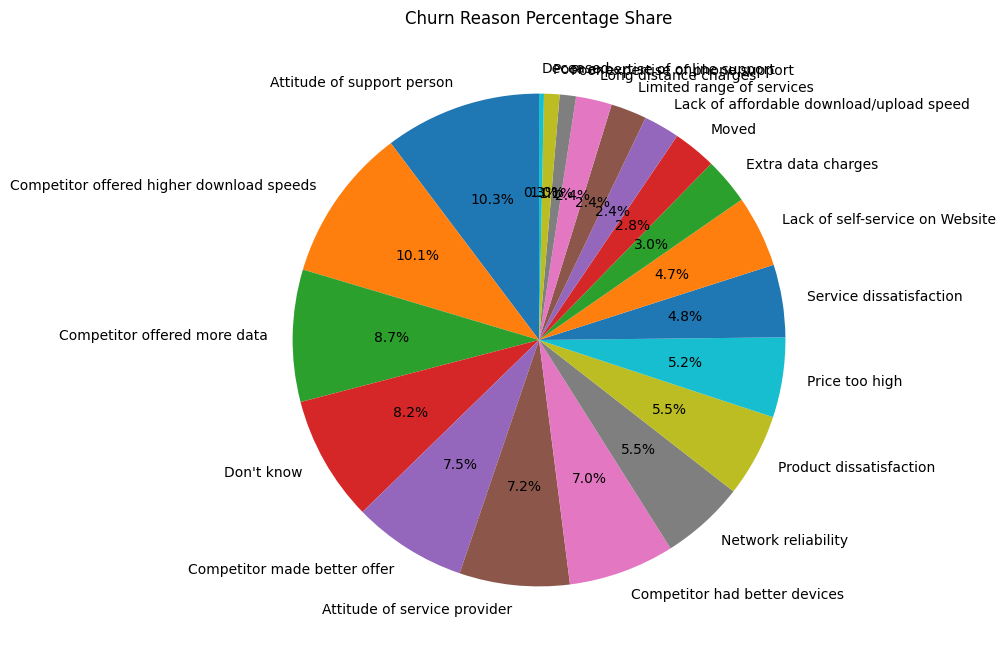

In [ ]:
plt.figure(figsize=(8,8))
plt.pie(
    churn_reason_counts,
    labels=churn_reason_counts.index,
    autopct="%1.1f%%",
    startangle=90
)
plt.title("Churn Reason Percentage Share")
plt.show()


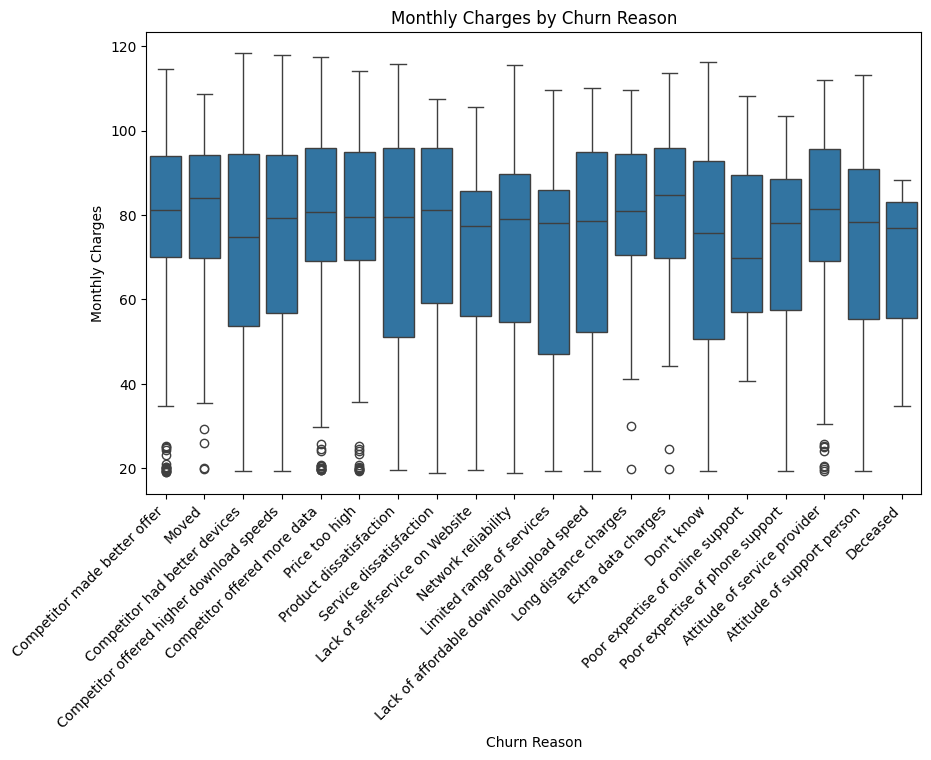

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(
    x="Churn Reason",
    y="Monthly Charges",
    data=churned_df
)
plt.title("Monthly Charges by Churn Reason")
plt.xticks(rotation=45, ha="right")
plt.show()


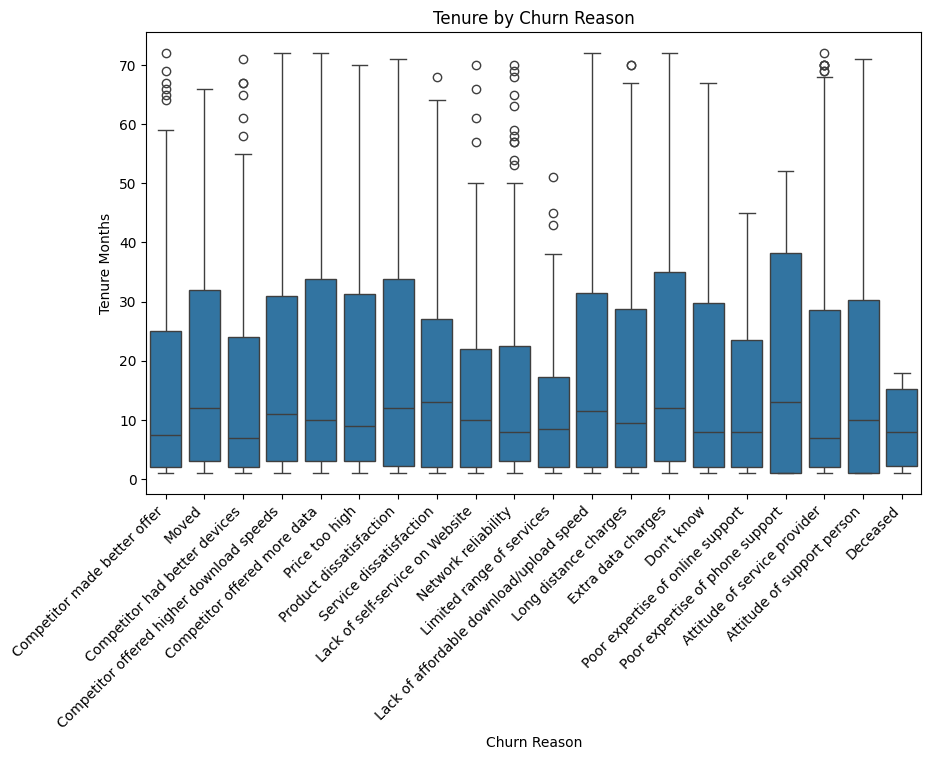

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(
    x="Churn Reason",
    y="Tenure Months",
    data=churned_df
)
plt.title("Tenure by Churn Reason")
plt.xticks(rotation=45, ha="right")
plt.show()


In [ ]:
report_path = "/content/drive/MyDrive/Customer_churn_Telecom/reports/figures"
os.makedirs(report_path, exist_ok=True)

# Figure 10
plt.figure(figsize=(10,6))
churn_reason_counts.plot(kind="bar")
plt.title("Churn Reasons Distribution")
plt.savefig(os.path.join(report_path, "Fig10_Churn_Reasons_Distribution.png"))
plt.close()

# Figure 11
plt.figure(figsize=(8,8))
plt.pie(churn_reason_counts, labels=churn_reason_counts.index, autopct="%1.1f%%")
plt.title("Churn Reason Percentage")
plt.savefig(os.path.join(report_path, "Fig11_Churn_Reasons_Pie.png"))
plt.close()
